# Week_3 Assignment_1: Опорные объекты

https://www.coursera.org/learn/vvedenie-mashinnoe-obuchenie/programming/50VrR/opornyie-obiekty

Данное задание основано на материалах лекций по методам опорных векторов.

#### Вы научитесь:
- работать с методом опорных векторов (SVM)
- находить наиболее важные объекты выборки

#### Введение
Метод опорных векторов (Support Vector Machine, SVM) — один из видов линейных классификаторов. Функционал, который он оптимизирует, направлен на максимизацию ширины разделяющей полосы между классами. Из теории статистического обучения известно, что эта ширина тесно связана с обобщающей способностью алгоритма, а ее максимизация позволяет бороться с переобучением.

Метод опорных векторов имеет еще одну особенность. Если преобразовать его оптимизационную задачу, то окажется, что итоговый классификатор можно представить как взвешенную сумму скалярных произведений данного объекта на объекты обучающей выборки:

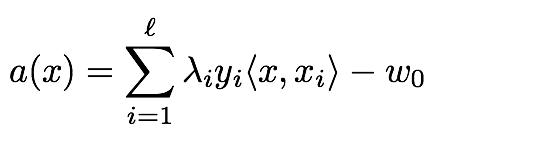

По сути, алгоритм делает предсказания на основе сходства нового объекта с объектами обучающей выборки. При этом, как правило, далеко не все коэффициенты оказываются ненулевыми. Это означает, что классификация делается на основе сходства лишь с частью обучающих объектов. Такие объекты называются опорными.

#### Реализация в Scikit-Learn
Метод опорных векторов реализован в классе [sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=sklearn%20svm%20svc#sklearn.svm.SVC).
- Основными параметрами этого класса являются коэффициент С и тип ядра kernel. В данной задаче мы будем использовать линейное ядро — для этого нужно задать значение параметра kernel='linear'
- Индексы опорных объектов обученного классификатора хранятся в поле support_

#### Инструкция по выполнению
1. Загрузите выборку из файла svm-data.csv. В нем записана двумерная выборка (целевая переменная указана в первом столбце, признаки — во втором и третьем).
2. Обучите классификатор с линейным ядром, параметром C = 100000 и random_state=241. Такое значение параметра нужно использовать, чтобы убедиться, что SVM работает с выборкой как с линейно разделимой. При более низких значениях параметра алгоритм будет настраиваться с учетом слагаемого в функционале, штрафующего за маленькие отступы, из-за чего результат может не совпасть с решением классической задачи SVM для линейно разделимой выборки.
3. Найдите номера объектов, которые являются опорными (нумерация с единицы). Они будут являться ответом на задание. Обратите внимание, что в качестве ответа нужно привести номера объектов в возрастающем порядке через запятую или пробел. Нумерация начинается с 1.

In [2]:
# load libraries
import pandas as pd
import numpy as np
import sklearn

## Ответы на вопросы задания

### 1. Загрузите выборку из файла svm-data.csv

In [3]:
df = pd.read_csv('svm-data.csv', header=None)
df

,0,1,2
0,0.0,0.70,0.29
1,1.0,0.23,0.55
2,0.0,0.72,0.42
3,0.0,0.98,0.68
4,0.0,0.48,0.39
5,1.0,0.34,0.73
6,0.0,0.44,0.06
7,1.0,0.40,0.74
8,0.0,0.18,0.18
9,1.0,0.53,0.53


In [4]:
df.shape

(10, 3)

In [6]:
X = df.values[:,1:]
y = df.values[:,0]

### 2. Обучите классификатор с линейным ядром

In [7]:
from sklearn.svm import SVC
clf = SVC(C=100000, kernel='linear', random_state=241)
clf.fit(X, y)

SVC(C=100000, kernel='linear', random_state=241)

### 3. Найдите номера объектов, которые являются опорными

In [10]:
support = clf.support_
support

array([3, 4, 9], dtype=int32)

**Ответ: 3 4 9**